In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from pathlib import Path
import seaborn as sns
import os

In [60]:
root = Path("hackdata/sentinel-beetles/")
train_df = pd.read_csv(root / "public_release" / "train.csv")
val_df = pd.read_csv(root / "public_release" / "val.csv")

#combine all train data(training and validation set)
df = pd.concat([train_df, val_df], ignore_index=True)

#display example of data structure
df.head()

SPEI_1y  SPEI_2y  SPEI_30d   public_id  eventID  domainID  \
0   -0.710   -0.572     0.552   854913723      727        46   
1    1.690    2.090     0.074   347472321      203         3   
2    1.450    1.010     1.442  2978263291      122         3   
3   -0.900   -0.710    -0.390  1290955733     1404       202   
4    0.668    1.130     0.168  3303810999      777        46   

           scientificName  siteID collectDate relative_img_loc  \
0           Carabus goryi       8  2017-07-11    854913723.png   
1  Pterostichus coracinus      24  2019-08-29    347472321.png   
2      Chlaenius aestivus       2  2018-07-03   2978263291.png   
3    Pasimachus elongatus      30  2018-06-14   1290955733.png   
4           Carabus goryi       8  2022-06-21   3303810999.png   

             colorpicker_path            scalebar_path  
0  colorpicker_1672529627.png  scalebar_1672529627.png  
1   colorpicker_168205273.png   scalebar_168205273.png  
2  colorpicker_2862281417.png  scalebar_2862281417.png  
3  colorpicker_2115179197.png  scalebar_2115179197.png  
4  colorpicker_1758976511.png  scalebar_1758976511.png

In [61]:
## Training dataset size:
print(f'Total number of training images: {len(train_df)}')
print(f'Total number of domains in training data: {train_df['domainID'].nunique()}')
print(f'Total number of events in training data: {train_df['eventID'].nunique()}')

## Validation dataset size:
print(f'Total number of validation images: {len(val_df)}')
print(f'Total number of domains in validation data: {val_df['domainID'].nunique()}')
print(f'Total number of events in validation data: {val_df['eventID'].nunique()}')

Total number of training images: 22370
Total number of domains in training data: 10
Total number of events in training data: 1088
Total number of validation images: 2486
Total number of domains in validation data: 10
Total number of events in validation data: 739


In [62]:
## checking values w/ examples

## Overall:
#SPEI_30d
print(f'SPEI_30 min value of {df['SPEI_30d'].min()} and max value of {df['SPEI_30d'].max()} with a mean of {df['SPEI_30d'].mean()} and std of {df['SPEI_30d'].std()}')
#SPEI_1y
print(f'SPEI_1y min value of {df['SPEI_1y'].min()} and max value of {df['SPEI_1y'].max()} with a mean of {df['SPEI_1y'].mean()} and std of {df['SPEI_1y'].std()}')
#SPEI_2y
print(f'SPEI_2y min value of {df['SPEI_2y'].min()} and max value of {df['SPEI_2y'].max()} with a mean of {df['SPEI_2y'].mean()} and std of {df['SPEI_2y'].std()} \n')

#range of collection date --> make sure collectDate is in date format
df['collectDate'] = pd.to_datetime(train_df['collectDate'], format='mixed')

print(f'first collection date: {train_df['collectDate'].min()}')
print(f'last collection date: {train_df['collectDate'].max()}')

SPEI_30 min value of -2.08999991416931 and max value of 2.08999991416931 with a mean of 0.13572709470827557 and std of 0.996153365598546
SPEI_1y min value of -2.08999991416931 and max value of 2.08999991416931 with a mean of 0.4507903867020651 and std of 1.0558856185910284
SPEI_2y min value of -2.08999991416931 and max value of 2.08999991416931 with a mean of 0.5450287278920396 and std of 1.1124685586427403 

first collection date: 2014-06-03
last collection date: 2023-10-11


In [63]:
## TRAINING: 

print(f'TRAINING DATA --> SPEI_30 min value of {train_df['SPEI_30d'].min()} and max value of {train_df['SPEI_30d'].max()} with a mean of {train_df['SPEI_30d'].mean()} and std of {train_df['SPEI_30d'].std()}')
print(f'TRAINING DATA --> SPEI_1y value of {train_df['SPEI_1y'].min()} and max value of {train_df['SPEI_1y'].max()} with a mean of {train_df['SPEI_1y'].mean()} and std of {train_df['SPEI_1y'].std()}')
print(f'TRAINING DATA --> SPEI_2y min value of {train_df['SPEI_2y'].min()} and max value of {train_df['SPEI_2y'].max()} with a mean of {train_df['SPEI_2y'].mean()} and std of {train_df['SPEI_2y'].std()} \n')

## VALIDATION:

print(f'VALIDATION DATA --> SPEI_30 min value of {val_df['SPEI_30d'].min()} and max value of {val_df['SPEI_30d'].max()} with a mean of {val_df['SPEI_30d'].mean()} and std of {val_df['SPEI_30d'].std()}')
print(f'VALIDATION DATA --> SPEI_1y value of {val_df['SPEI_1y'].min()} and max value of {val_df['SPEI_1y'].max()} with a mean of {val_df['SPEI_1y'].mean()} and std of {val_df['SPEI_1y'].std()}')
print(f'VALIDATION DATA --> SPEI_2y min value of {val_df['SPEI_2y'].min()} and max value of {val_df['SPEI_2y'].max()} with a mean of {val_df['SPEI_2y'].mean()} and std of {val_df['SPEI_2y'].std()} \n')

TRAINING DATA --> SPEI_30 min value of -2.08999991416931 and max value of 2.08999991416931 with a mean of 0.13804972421762585 and std of 0.9946998837504399
TRAINING DATA --> SPEI_1y value of -2.08999991416931 and max value of 2.08999991416931 with a mean of 0.451175854504708 and std of 1.0556888604800372
TRAINING DATA --> SPEI_2y min value of -2.08999991416931 and max value of 2.08999991416931 with a mean of 0.5466129500373003 and std of 1.112073633306731 

VALIDATION DATA --> SPEI_30 min value of -2.08999991416931 and max value of 2.08999991416931 with a mean of 0.1148271662592948 and std of 1.0091000875034288
VALIDATION DATA --> SPEI_1y value of -2.08999991416931 and max value of 2.08999991416931 with a mean of 0.4473217967000047 and std of 1.05786086472211
VALIDATION DATA --> SPEI_2y min value of -2.08999991416931 and max value of 2.08999991416931 with a mean of 0.5307732776146941 and std of 1.1161391449441331 



In [64]:
'''
directory_path = Path('hackdata/sentinel-beetles/data') # '.' refers to the current directory
files = [p for p in directory_path.iterdir() if p.is_file()]
train_files = list()
validation_files = list()

for file in files:
    if "train" in file.name:
        train_files.append(file.name)
    else:
        validation_files.append(file.name)
print(len(train_files))
print(len(validation_files))

out_dir = "validation_images"
os.makedirs(out_dir, exist_ok=True)

for i in range(len(validation_files)):
    print(validation_files[i])
    df = pd.read_parquet(os.path.join(directory_path, validation_files[i]))

    for j in range(len(df)):
    # for j in range(1):
        img_bytes = df.loc[j, "file_path"]["bytes"]
        rel = str(df.loc[j, "relative_img_loc"])
        rel = rel.lstrip("/")
        out_path = os.path.join(out_dir, rel)
        if os.path.splitext(out_path)[1] == "":
            out_path += ".png"
        with open(out_path, "wb") as f:
            f.write(img_bytes)

directory_path = Path('validation_images') # '.' refers to the current directory
files = [p for p in directory_path.iterdir() if p.is_file()]
train_files = list()
validation_files = list()

print(len(files))
print("done")
'''

'\ndirectory_path = Path(\'hackdata/sentinel-beetles/data\') # \'.\' refers to the current directory\nfiles = [p for p in directory_path.iterdir() if p.is_file()]\ntrain_files = list()\nvalidation_files = list()\n\nfor file in files:\n    if "train" in file.name:\n        train_files.append(file.name)\n    else:\n        validation_files.append(file.name)\nprint(len(train_files))\nprint(len(validation_files))\n\nout_dir = "validation_images"\nos.makedirs(out_dir, exist_ok=True)\n\nfor i in range(len(validation_files)):\n    print(validation_files[i])\n    df = pd.read_parquet(os.path.join(directory_path, validation_files[i]))\n\n    for j in range(len(df)):\n    # for j in range(1):\n        img_bytes = df.loc[j, "file_path"]["bytes"]\n        rel = str(df.loc[j, "relative_img_loc"])\n        rel = rel.lstrip("/")\n        out_path = os.path.join(out_dir, rel)\n        if os.path.splitext(out_path)[1] == "":\n            out_path += ".png"\n        with open(out_path, "wb") as f:\n    

In [55]:
from ultralytics import SAM
from pathlib import Path
import numpy as np
import cv2
import os
from PIL import Image
from scipy.ndimage import binary_fill_holes

## if the masking area is less than like 10% of W*H, then randomize your point by a bit and try again
## if your mask takes up a very large percent of W*H, then also redo your try

## ^^ both not needed!

## maybe we can use the confidence metric (better idea)

directory_path = Path("training_images")
files = [p for p in directory_path.iterdir() if p.is_file()]
out_dir = "masked_bugs"
os.makedirs(out_dir, exist_ok = True)

# Load a model
model = SAM("sam2.1_l.pt")

# Display model information
model.info()

for file in files[1200:1250]:
    img = cv2.imread(str(file))
    H, W = img.shape[:2]

    points = [[W * 0.5, H * 0.35], [5, 5]]
    labels = [1, 0]
    results = model(str(file), points = points, labels = labels)
    r = results[0]

    if r.masks is None:
        continue

    masks = r.masks.data.cpu().numpy()

    # it's better to calculate the best mask based on area coverage than the confidence interval
    best_mask = None
    best_area = 0

    for m in masks:
        area = m.sum()
        area_ratio = area / (W * H)

        if 0.25 < area_ratio < 0.75:
            if area > best_area:
                best_area = area
                best_mask = m

    if best_mask is None:
        print(f"Skipping {file.name}: no valid mask")
        continue

    ## now need smooth out + "polish"

    mask = binary_fill_holes(best_mask).astype(np.uint8) # fill in holes
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, np.ones((5,5), np.uint8))
    mask = cv2.dilate(mask, np.ones((3,3), np.uint8), iterations=1) ## stretch to fill space

    ## want to renormalize things to not be sensitive to beetle size
    FINAL_SIZE = 512
    TARGET_FRACTION = 0.67  # beetle occupies roughly 2/3 of frame

    ## fill in the missing parts with a white square around the bug cutout
    ys, xs = np.where(mask > 0)
    ymin, ymax = ys.min(), ys.max()
    xmin, xmax = xs.min(), xs.max()
    
    beetle = img[ymin:ymax+1, xmin:xmax+1]
    beetle_mask = mask[ymin:ymax+1, xmin:xmax+1]
    
    h, w = beetle.shape[:2]

    # scale normalization:
    target_size = int(TARGET_FRACTION * FINAL_SIZE)
    current_size = max(h, w)
    scale = target_size / current_size
    
    new_h = int(h * scale)
    new_w = int(w * scale)
    
    beetle = cv2.resize(beetle, (new_w, new_h), interpolation=cv2.INTER_AREA)
    beetle_mask = cv2.resize(beetle_mask, (new_w, new_h), interpolation=cv2.INTER_NEAREST)

    # adding white square padding around the sides
    side = max(new_h, new_w)
    square = np.ones((side, side, 3), dtype=np.uint8) * 255
    
    yoff = (side - new_h) // 2
    xoff = (side - new_w) // 2
    
    square[yoff:yoff+new_h, xoff:xoff+new_w][beetle_mask > 0] = \
        beetle[beetle_mask > 0]
    
    # resizing to consistent 512 x 512 size
    square = cv2.resize(square, (FINAL_SIZE, FINAL_SIZE), interpolation=cv2.INTER_AREA)

    ## save the image
    out_path = os.path.join(out_dir, file.stem + ".png")
    cv2.imwrite(out_path, square)

    print(f"Saved beetle cutout! --> {out_path}")

print("All done!")

Model summary: 652 layers, 224,446,642 parameters, 224,446,642 gradients

image 1/1 /home/jovyan/training_images/2571725793.png: 1024x1024 1 0, 245.7ms
Speed: 4.0ms preprocess, 245.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)
Skipping 2571725793.png: no valid mask

image 1/1 /home/jovyan/training_images/2615422567.png: 1024x1024 1 0, 242.8ms
Speed: 3.6ms preprocess, 242.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)
Skipping 2615422567.png: no valid mask

image 1/1 /home/jovyan/training_images/4219500359.png: 1024x1024 1 0, 1 1, 242.1ms
Speed: 3.9ms preprocess, 242.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)
Saved beetle cutout! --> masked_bugs/4219500359.png

image 1/1 /home/jovyan/training_images/4256233381.png: 1024x1024 1 0, 242.2ms
Speed: 3.7ms preprocess, 242.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)
Saved beetle cutout! --> masked_bugs/4256233381.png

image 1/1 /home/jovyan/

1114


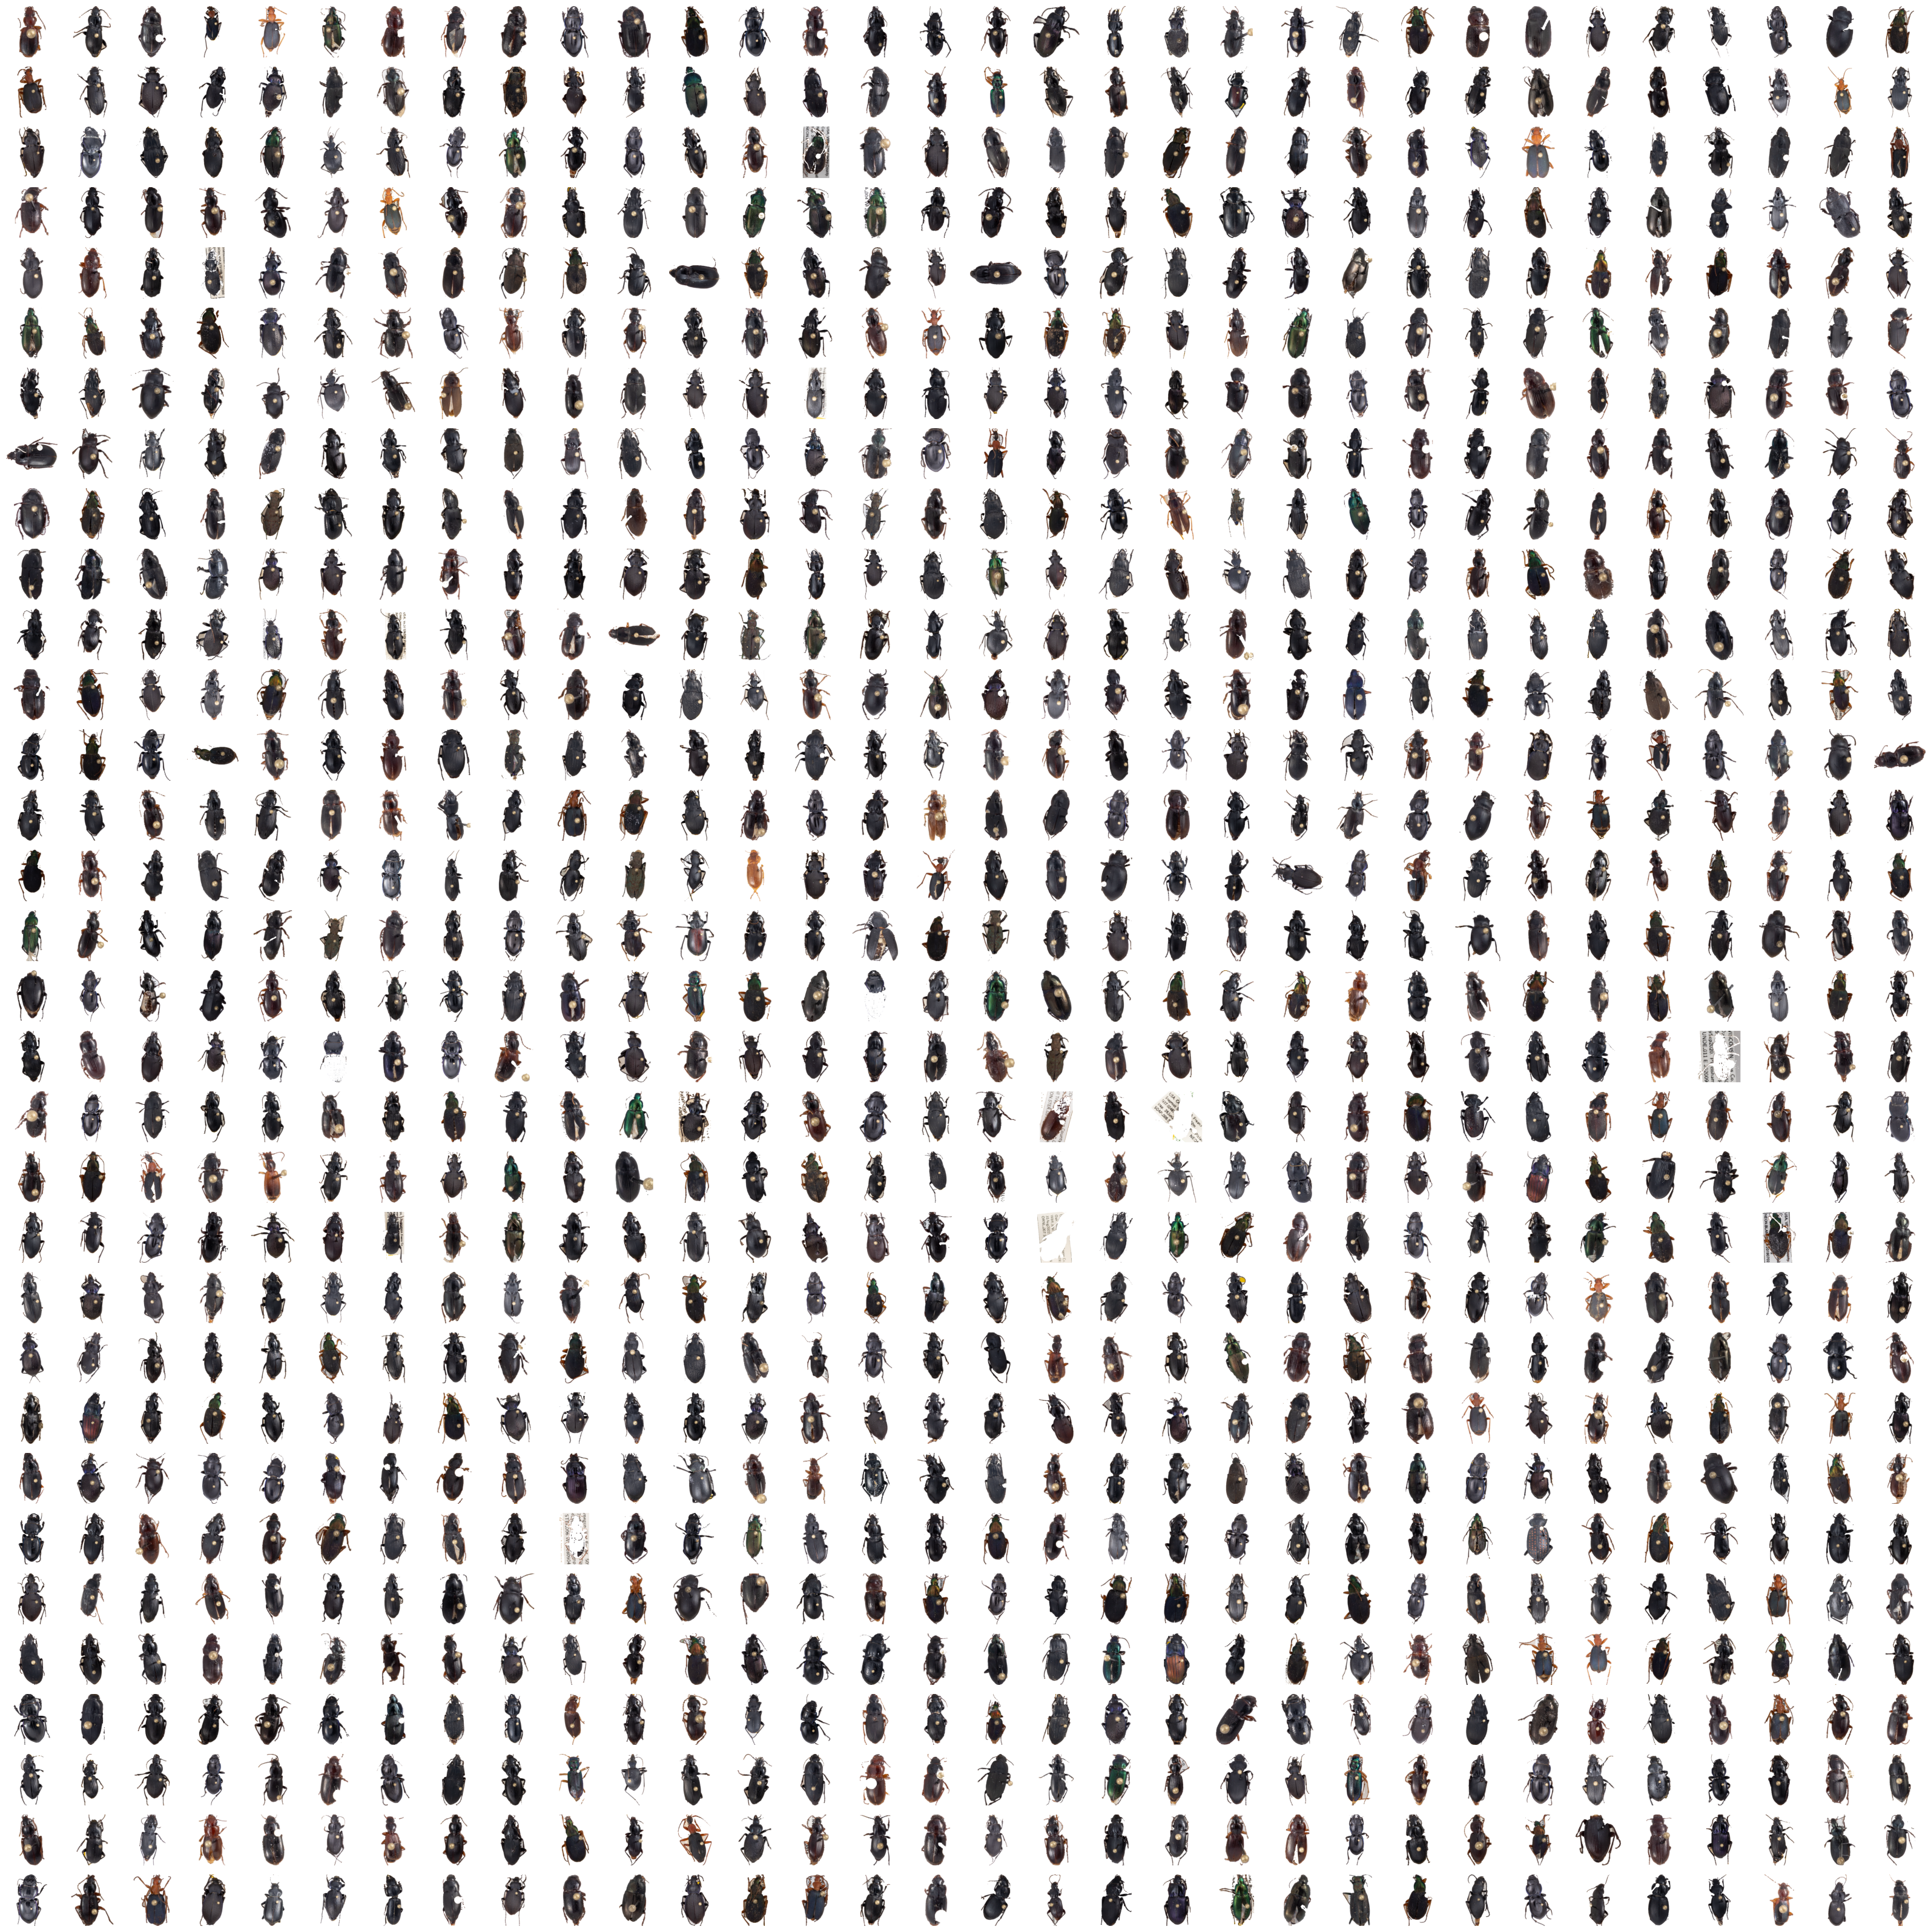

In [66]:
import glob

folder_path_example = "masked_bugs" 

image_files = glob.glob(os.path.join(folder_path, '*.png'))
print(len(image_files))

num_images = 1024
images_to_display = image_files[:num_images]

if not images_to_display:
    print(f"No PNG files found in the directory: {folder_path}")

if len(images_to_display) < num_images:
    print(f"Found only {len(images_to_display)} PNG files. Displaying all of them.")
    num_images = len(images_to_display)

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(32, 32, figsize = (32, 32))
axes = axes.flatten()

for i in range(num_images):
    try:
        img = Image.open(images_to_display[i])
        
        # Display the image on the corresponding axis
        axes[i].imshow(img)
        axes[i].axis('off')
        
    except IOError as e:
        print(f"Error opening image {images_to_display[i]}: {e}")
        axes[i].axis('off')

# Hide any remaining empty axes if fewer than 100 images were found
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.savefig("bugs!!!.png")